In [4]:
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"
from PIL import ImageOps, Image
import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array
import cv2
import segmentation_models
import numpy as np
import matplotlib.pyplot as plt
model = tf.keras.models.load_model("../Models/brain tumour segmentation model.h5",compile=False)

Segmentation Models: using `tf.keras` framework.


In [34]:
images = cv2.imread('../flair.png', 0)
print(images)
images = [cv2.imread('../flair.png', 0), cv2.imread('../flair.png', 0), cv2.imread('../flair.png', 0)]
images = np.stack(images, axis=-1)
# plt.imshow(images)
print(images.shape)
img=cv2.resize(images ,(256,256))
im=img/255
im=np.expand_dims(im,axis=0)
im=im.astype(np.float32)
print(im.shape)
out=model.predict(im)

[[[68.  1. 84.]
  [68.  1. 84.]
  [68.  1. 84.]
  ...
  [68.  1. 84.]
  [68.  1. 84.]
  [68.  1. 84.]]

 [[68.  1. 84.]
  [68.  1. 84.]
  [68.  1. 84.]
  ...
  [68.  1. 84.]
  [68.  1. 84.]
  [68.  1. 84.]]

 [[68.  1. 84.]
  [68.  1. 84.]
  [68.  1. 84.]
  ...
  [68.  1. 84.]
  [68.  1. 84.]
  [68.  1. 84.]]

 ...

 [[68.  1. 84.]
  [68.  1. 84.]
  [68.  1. 84.]
  ...
  [68.  1. 84.]
  [68.  1. 84.]
  [68.  1. 84.]]

 [[68.  1. 84.]
  [68.  1. 84.]
  [68.  1. 84.]
  ...
  [68.  1. 84.]
  [68.  1. 84.]
  [68.  1. 84.]]

 [[68.  1. 84.]
  [68.  1. 84.]
  [68.  1. 84.]
  ...
  [68.  1. 84.]
  [68.  1. 84.]
  [68.  1. 84.]]]
(1, 256, 256, 3)
1/1 [==============================] - 0s 215ms/step


Text(0.5, 1.0, 'Segmented')

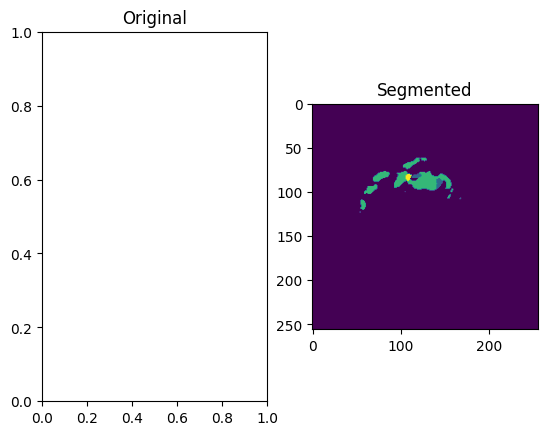

In [35]:
import matplotlib.pyplot as plt
segmented = np.argmax(out, axis=-1)
plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Original")
plt.subplot(1,2,2)
plt.imshow(segmented[0])
plt.title("Segmented")

In [45]:
images = cv2.imread('../Images/T1 T2 Flair Dataset/TCGA-02-0011-38-flair-wild.png', 1)
maps = [cv2.COLORMAP_AUTUMN, cv2.COLORMAP_BONE, cv2.COLORMAP_CIVIDIS, cv2.COLORMAP_COOL, cv2.COLORMAP_DEEPGREEN, cv2.COLORMAP_HOT, cv2.COLORMAP_HSV, cv2.COLORMAP_INFERNO, cv2.COLORMAP_MAGMA, cv2.COLORMAP_OCEAN, cv2.COLORMAP_PARULA, cv2.COLORMAP_PINK, cv2.COLORMAP_SUMMER, cv2.COLORMAP_PLASMA, cv2.COLORMAP_RAINBOW, cv2.COLORMAP_WINTER, cv2.COLORMAP_TURBO, cv2.COLORMAP_TWILIGHT, cv2.COLORMAP_TWILIGHT_SHIFTED, cv2.COLORMAP_VIRIDIS]
for i in maps:
    converted = cv2.applyColorMap(images, i)
    print(i)
    cv2.imwrite(f"../Images/maps/{str(i)}.png", converted)

0
1
17
8
21
11
9
14
13
5
12
10
6
15
4
3
20
18
19
16
